Importing important Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

I have first uploaded the Item_description dataset on my Gdrive and then monted on the notebook.

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Reading the dataset as item_description for description .

In [4]:
item_description=pd.read_csv('/content/gdrive/MyDrive/description.csv')

Printing dimension of our dataset.

In [5]:
item_description.shape

(124428, 2)

Checking for missing values and eliminating them.

This dataset has two fields- product_uid and product_description

In [7]:
item_description = item_description.dropna()
item_description.shape
item_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


Printing ItemIDs with their respective Descriptions

In [8]:
item_description = item_description.head(500)
item_description["product_description"].head(10)


0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

Featurization of items- There can be various features of a unique item. For ex- its name, description, category, brand and cost. Among them category have the highest weightage. But due to lack of data we are making clusters on the basis of description, as this is also key feature for any item.


Converting the text in item_description into numerical data for analysis and vectorizing it using TfidVectorizer.

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(item_description["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

We have made 10 clusters within item dataset on the basis of description.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


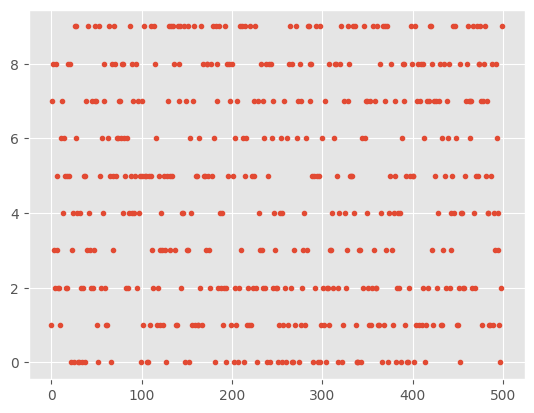

In [11]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

Printing Top Related Products for each cluster. These products are the centroids of any cluster.

In [14]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [15]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 fence
 post
 vinyl
 ft
 gate
 kit
 easy
 rail
 installation
 use
Cluster 1:
 air
 light
 power
 cooling
 unit
 window
 watt
 fan
 ft
 led
Cluster 2:
 water
 toilet
 flush
 bowl
 design
 tank
 helps
 20
 m12
 wax
Cluster 3:
 deck
 center
 roof
 plate
 pull
 posts
 cabinet
 post
 speaker
 wall
Cluster 4:
 metal
 drill
 use
 hole
 screw
 screws
 cutting
 gauge
 steel
 light
Cluster 5:
 frame
 patio
 outdoor
 piece
 aluminum
 finish
 easy
 dining
 resistant
 fabric
Cluster 6:
 wood
 bamboo
 brush
 panels
 ft
 natural
 easy
 garage
 fencing
 door
Cluster 7:
 cooking
 oven
 cycle
 water
 cu
 wash
 gas
 ft
 easy
 control
Cluster 8:
 brass
 kitchen
 water
 solid
 stainless
 sink
 steel
 design
 soap
 features
Cluster 9:
 wall
 vary
 concrete
 ft
 product
 landscape
 easy
 walls
 tile
 home


A show_recommendation function is written which will give top related items related to input. The internal functioning of this function is that- it first finds out from which cluster the current input item belongs to and then show top related items to it.

In [16]:
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

For ex- User buys oven, furniture and battery. They belong to cluster 7, 7 and 5 respectively. Hence user will be recommended a combine catalogue of top related products of the following clusters.

In [17]:
show_recommendations("oven")

Cluster 7:
 cooking
 oven
 cycle
 water
 cu
 wash
 gas
 ft
 easy
 control


In [18]:
show_recommendations("furniture")

Cluster 8:
 brass
 kitchen
 water
 solid
 stainless
 sink
 steel
 design
 soap
 features


In [19]:
show_recommendations("battery")

Cluster 2:
 water
 toilet
 flush
 bowl
 design
 tank
 helps
 20
 m12
 wax
